In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [3]:
census_filename = "nc-est2014-agesex-res.csv"
full = Table.read_table(census_filename) # load in the census table
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [4]:
# Keep only the columns we care about
# sex, age, estimate from 2010, estimate from 2014
partial = full.select("SEX", "AGE", "POPESTIMATE2010", "POPESTIMATE2014")
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [6]:
# Make things easier to read by changing the names of the estimate labels
simple = partial.relabel("POPESTIMATE2010", "2010").relabel("POPESTIMATE2014", "2014")
simple

ValueError: Invalid labels. Column labels must already exist in table in order to be replaced.

In [8]:
partial.relabeled("2010", "estimate2010")

SEX,AGE,estimate2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [11]:
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [12]:
# Sort by age
simple.sort("AGE")

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [14]:
# Sort by age (another way)
simple.sort("AGE", descending=True)

SEX,AGE,2010,2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569
0,100,54409,72197
1,100,9351,13729
2,100,45058,58468
0,99,32178,41828
1,99,6104,9037
2,99,26074,32791
0,98,47037,60185


In [23]:
# get the 2010 estimates where sex is 1
simple.where("SEX", 2).sort("AGE", descending=True).num_rows

102

In [22]:
simple.where("SEX", 2).where("AGE", are.below(101)).num_rows

101

In [24]:
simple.where("SEX", 2).where("AGE", are.below(101)).sort("AGE", descending=True)

SEX,AGE,2010,2014
2,100,45058,58468
2,99,26074,32791
2,98,37533,46536
2,97,54118,63252
2,96,75139,89949
2,95,99341,114300
2,94,126947,156525
2,93,158881,200353
2,92,205379,244659
2,91,240152,288866


In [27]:
# find the sum of 2010 pop estimate of sex 1
pop_2010_estimate_sum = sum(simple.where("SEX", 2).where("AGE", are.below(101)).column("2010"))
pop_2010_estimate_sum

157257573

In [36]:
# take the 2010 estimate for age 999 and gender 2 and assign it to a name
nnn_2010_estimate = simple.sort("AGE", descending=True).take(2).column("2010").item(0)

In [37]:
pop_2010_estimate_sum == nnn_2010_estimate 

True

In [38]:
pop_2010_estimate_sum == 1

False

In [15]:
# lets check if 999 means the total population
simple.column("2010")


array([  3951330,   3957888,   4090862,   4111920,   4077552,   4064653,
         4073013,   4043047,   4025604,   4125415,   4187063,   4115511,
         4113280,   4119666,   4145614,   4231003,   4313252,   4376368,
         4491005,   4571385,   4568470,   4387914,   4286987,   4217221,
         4243589,   4289424,   4160810,   4237010,   4247540,   4210285,
         4304244,   4042507,   3967603,   3933570,   3822188,   3948318,
         3830202,   3896776,   4080229,   4324460,   4387483,   4163470,
         4082733,   4093841,   4178501,   4438551,   4529712,   4535464,
         4534669,   4599102,   4646251,   4498994,   4480630,   4439422,
         4288475,   4259012,   4093161,   3946548,   3802467,   3694276,
         3616733,   3520121,   3495073,   3652174,   2706063,   2678532,
         2621346,   2693709,   2359819,   2167833,   2062581,   1953614,
         1883821,   1750309,   1685999,   1631879,   1481683,   1449173,
         1402184,   1354913,   1319725,   1212603, 

# Column Arithmetic 

Difference between 14 estimate and 10 estimate

In [39]:
simple


SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [41]:
aa = make_array(1,2,3)
bb = make_array(4,5,6)
aa, bb

(array([1, 2, 3]), array([4, 5, 6]))

In [43]:
aa - bb

array([-3, -3, -3])

In [44]:
aa * bb

array([ 4, 10, 18])

In [47]:
estimates_2010 = simple.column("2010")

In [48]:
estimates_2014 = simple.select("2014")
estimates_2014

2014
3948350
3962123
3957772
4005190
4003448
4004858
4134352
4154000
4119524
4106832


In [49]:
estimates_2014 - estimates_2010

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


ValueError: invalid __array_struct__

In [51]:
type(estimates_2014), type(estimates_2010)

(datascience.tables.Table, numpy.ndarray)

In [53]:
# get the 2014 estimate as an array
estimates_2014 = simple.column("2014")
estimates_2014

array([  3948350,   3962123,   3957772,   4005190,   4003448,   4004858,
         4134352,   4154000,   4119524,   4106832,   4115254,   4085636,
         4068790,   4169346,   4232480,   4163723,   4167234,   4184706,
         4225590,   4326394,   4418887,   4489746,   4612322,   4698584,
         4692635,   4509594,   4406472,   4332545,   4351851,   4387476,
         4250780,   4318706,   4320072,   4276113,   4362895,   4094039,
         4014413,   3974190,   3859181,   3979827,   3856888,   3917413,
         4095929,   4332491,   4388762,   4161450,   4076237,   4082150,
         4158996,   4409209,   4491431,   4488666,   4480175,   4535748,
         4574789,   4421625,   4395471,   4347179,   4191757,   4155417,
         3985367,   3834428,   3685822,   3572379,   3488136,   3384449,
         3347776,   3485502,   2572527,   2535012,   2466485,   2519748,
         2194234,   2002191,   1890366,   1774697,   1694648,   1557239,
         1481505,   1414235,   1264072,   1216009, 

In [54]:
estimates_2014 - estimates_2010

array([  -2980,    4235, -133090, -106730,  -74104,  -59795,   61339,
        110953,   93920,  -18583,  -71809,  -29875,  -44490,   49680,
         86866,  -67280, -146018, -191662, -265415, -244991, -149583,
        101832,  325335,  481363,  449046,  220170,  245662,   95535,
        104311,  177191,  -53464,  276199,  352469,  342543,  540707,
        145721,  184211,   77414, -221048, -344633, -530595, -246057,
         13196,  238650,  210261, -277101, -453475, -453314, -375673,
       -189893, -154820,  -10328,    -455,   96326,  286314,  162613,
        302310,  400631,  389290,  461141,  368634,  314307,  190749,
        -79795,  782073,  705917,  726430,  791793,  212708,  367179,
        403904,  566134,  310413,  251882,  204367,  142818,  212965,
        108066,   79321,   59322,  -55653,    3406,   -4718,    9023,
         49160,    9954,   34146,   49490,   38830,   53641,   64522,
         82503,   65691,   67270,   47880,   26047,   24023,   14838,
         13148,    9

In [56]:
#no arithmatic between tables, need to first extract the columns
# as arrays
# H/T Kate!
simple.select("2014") - simple.select("2010")

TypeError: unsupported operand type(s) for -: 'Table' and 'Table'

In [57]:
difference_in_estimates_14_10 = estimates_2014 - estimates_2010
difference_in_estimates_14_10

array([  -2980,    4235, -133090, -106730,  -74104,  -59795,   61339,
        110953,   93920,  -18583,  -71809,  -29875,  -44490,   49680,
         86866,  -67280, -146018, -191662, -265415, -244991, -149583,
        101832,  325335,  481363,  449046,  220170,  245662,   95535,
        104311,  177191,  -53464,  276199,  352469,  342543,  540707,
        145721,  184211,   77414, -221048, -344633, -530595, -246057,
         13196,  238650,  210261, -277101, -453475, -453314, -375673,
       -189893, -154820,  -10328,    -455,   96326,  286314,  162613,
        302310,  400631,  389290,  461141,  368634,  314307,  190749,
        -79795,  782073,  705917,  726430,  791793,  212708,  367179,
        403904,  566134,  310413,  251882,  204367,  142818,  212965,
        108066,   79321,   59322,  -55653,    3406,   -4718,    9023,
         49160,    9954,   34146,   49490,   38830,   53641,   64522,
         82503,   65691,   67270,   47880,   26047,   24023,   14838,
         13148,    9

## Make new table with change

In [58]:
# store the difference in array assigned to the name `changed`
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


#### addthe change as a column to a table

In [59]:
partial_census_change = simple.with_columns("change", difference_in_estimates_14_10)

partial_census_change

SEX,AGE,2010,2014,change
0,0,3951330,3948350,-2980
0,1,3957888,3962123,4235
0,2,4090862,3957772,-133090
0,3,4111920,4005190,-106730
0,4,4077552,4003448,-74104
0,5,4064653,4004858,-59795
0,6,4073013,4134352,61339
0,7,4043047,4154000,110953
0,8,4025604,4119524,93920
0,9,4125415,4106832,-18583


### Reformatter

In [60]:
## Reformat these changes
# NumberFormatter, PercentFormatter
# set_format
partial_census_change.set_format("2010", NumberFormatter)



SEX,AGE,2010,2014,change
0,0,"3,951,330",3948350,-2980
0,1,"3,957,888",3962123,4235
0,2,"4,090,862",3957772,-133090
0,3,"4,111,920",4005190,-106730
0,4,"4,077,552",4003448,-74104
0,5,"4,064,653",4004858,-59795
0,6,"4,073,013",4134352,61339
0,7,"4,043,047",4154000,110953
0,8,"4,025,604",4119524,93920
0,9,"4,125,415",4106832,-18583


In [61]:
partial_census_change

SEX,AGE,2010,2014,change
0,0,"3,951,330",3948350,-2980
0,1,"3,957,888",3962123,4235
0,2,"4,090,862",3957772,-133090
0,3,"4,111,920",4005190,-106730
0,4,"4,077,552",4003448,-74104
0,5,"4,064,653",4004858,-59795
0,6,"4,073,013",4134352,61339
0,7,"4,043,047",4154000,110953
0,8,"4,025,604",4119524,93920
0,9,"4,125,415",4106832,-18583


In [62]:
partial_census_change.set_format("2014", NumberFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,330","3,948,350",-2980
0,1,"3,957,888","3,962,123",4235
0,2,"4,090,862","3,957,772",-133090
0,3,"4,111,920","4,005,190",-106730
0,4,"4,077,552","4,003,448",-74104
0,5,"4,064,653","4,004,858",-59795
0,6,"4,073,013","4,134,352",61339
0,7,"4,043,047","4,154,000",110953
0,8,"4,025,604","4,119,524",93920
0,9,"4,125,415","4,106,832",-18583


In [63]:
partial_census_change.set_format("2014", PercentFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,330",394835000.00%,-2980
0,1,"3,957,888",396212300.00%,4235
0,2,"4,090,862",395777200.00%,-133090
0,3,"4,111,920",400519000.00%,-106730
0,4,"4,077,552",400344800.00%,-74104
0,5,"4,064,653",400485800.00%,-59795
0,6,"4,073,013",413435200.00%,61339
0,7,"4,043,047",415400000.00%,110953
0,8,"4,025,604",411952400.00%,93920
0,9,"4,125,415",410683200.00%,-18583


In [64]:
partial_census_change.set_format("2014", NumberFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,330","3,948,350",-2980
0,1,"3,957,888","3,962,123",4235
0,2,"4,090,862","3,957,772",-133090
0,3,"4,111,920","4,005,190",-106730
0,4,"4,077,552","4,003,448",-74104
0,5,"4,064,653","4,004,858",-59795
0,6,"4,073,013","4,134,352",61339
0,7,"4,043,047","4,154,000",110953
0,8,"4,025,604","4,119,524",93920
0,9,"4,125,415","4,106,832",-18583


### Interpretting these changes

**Are these changes meaningful?**

In [65]:
 # Convert changes to percentages
    # a = 5
    # b = 10
    # change = second - first
    # change/initial 
#partial_census_change_clean 
a = 5
b= 10
(b - a) / a * 100

100.0

In [66]:
a = 2
b= 4
(b - a) / a * 100

100.0

#### Let's add the eprcent change to the table

In [69]:
# change
change = partial_census_change.column("change")

In [71]:
initial = partial_census_change.column("2010")

In [73]:
percent_change = change / initial

In [74]:
tbl_with_percent_change = partial_census_change.with_column("percent change", percent_change)

In [76]:
tbl_with_percent_change.set_format("percent change", PercentFormatter)

SEX,AGE,2010,2014,change,percent change
0,0,"3,951,330","3,948,350",-2980,-0.08%
0,1,"3,957,888","3,962,123",4235,0.11%
0,2,"4,090,862","3,957,772",-133090,-3.25%
0,3,"4,111,920","4,005,190",-106730,-2.60%
0,4,"4,077,552","4,003,448",-74104,-1.82%
0,5,"4,064,653","4,004,858",-59795,-1.47%
0,6,"4,073,013","4,134,352",61339,1.51%
0,7,"4,043,047","4,154,000",110953,2.74%
0,8,"4,025,604","4,119,524",93920,2.33%
0,9,"4,125,415","4,106,832",-18583,-0.45%


In [78]:
partial_census_change

SEX,AGE,2010,2014,change
0,0,"3,951,330","3,948,350",-2980
0,1,"3,957,888","3,962,123",4235
0,2,"4,090,862","3,957,772",-133090
0,3,"4,111,920","4,005,190",-106730
0,4,"4,077,552","4,003,448",-74104
0,5,"4,064,653","4,004,858",-59795
0,6,"4,073,013","4,134,352",61339
0,7,"4,043,047","4,154,000",110953
0,8,"4,025,604","4,119,524",93920
0,9,"4,125,415","4,106,832",-18583


# Analyzing the results/table

In [ ]:
# find the regiion with the largest percentage change
# ignoring gender

In [80]:
tbl_with_percent_change.where("SEX", 0).sort("percent change")

SEX,AGE,2010,2014,change,percent change
0,40,"4,387,483","3,856,888",-530595,-12.09%
0,46,"4,529,712","4,076,237",-453475,-10.01%
0,47,"4,535,464","4,082,150",-453314,-9.99%
0,48,"4,534,669","4,158,996",-375673,-8.28%
0,39,"4,324,460","3,979,827",-344633,-7.97%
0,45,"4,438,551","4,161,450",-277101,-6.24%
0,18,"4,491,005","4,225,590",-265415,-5.91%
0,41,"4,163,470","3,917,413",-246057,-5.91%
0,38,"4,080,229","3,859,181",-221048,-5.42%
0,19,"4,571,385","4,326,394",-244991,-5.36%


In [81]:
tbl_with_percent_change.where("SEX", 0).sort("percent change", descending=True)

SEX,AGE,2010,2014,change,percent change
0,100,"54,409","72,197",17788,32.69%
0,93,"219,063","286,333",67270,30.71%
0,99,"32,178","41,828",9650,29.99%
0,67,"2,693,709","3,485,502",791793,29.39%
0,71,"1,953,614","2,519,748",566134,28.98%
0,64,"2,706,063","3,488,136",782073,28.90%
0,94,"170,775","218,655",47880,28.04%
0,98,"47,037","60,185",13148,27.95%
0,66,"2,621,346","3,347,776",726430,27.71%
0,65,"2,678,532","3,384,449",705917,26.35%


In [82]:
tbl_with_percent_change.where("SEX", 0).sort("change", descending=True)

SEX,AGE,2010,2014,change,percent change
0,999,"309,347,057","318,857,056",9509999,3.07%
0,67,"2,693,709","3,485,502",791793,29.39%
0,64,"2,706,063","3,488,136",782073,28.90%
0,66,"2,621,346","3,347,776",726430,27.71%
0,65,"2,678,532","3,384,449",705917,26.35%
0,71,"1,953,614","2,519,748",566134,28.98%
0,34,"3,822,188","4,362,895",540707,14.15%
0,23,"4,217,221","4,698,584",481363,11.41%
0,59,"3,694,276","4,155,417",461141,12.48%
0,24,"4,243,589","4,692,635",449046,10.58%


In [ ]:
# add anual growth based on total growth

(back to slides)
## Line Plots ##

In [83]:
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [85]:
# Remove the age totals

no_999 = simple.where("AGE", are.below(101)) #
no_999 = simple.where("AGE", are.not_equal_to(999))
no_999.num_rows

303

In [ ]:
# Look at the largest age and include everything below it

In [86]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


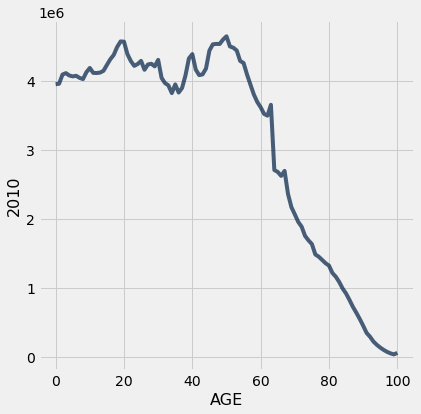

In [87]:
# Lets plot the number of ages during 2010
# Make Age the X-axis and 2010 the y-axis
everyone.plot('AGE', '2010')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

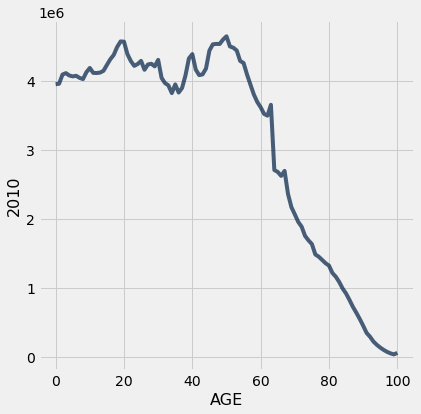

In [88]:
# add a python comment
# US Population in 2010, x-axis is age, y-axis is the number of people with that age
everyone.plot('AGE', '2010')

US Population in 2010
x-axis is age, y-axis is the number of people with that age


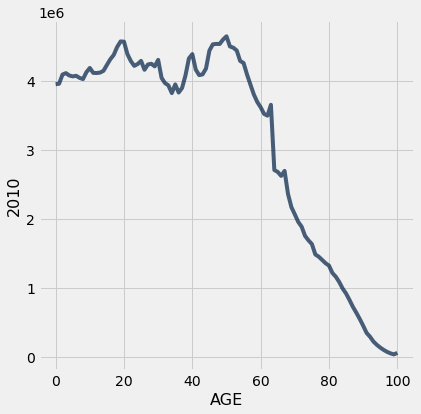

In [91]:
# print out what the tables is
print("US Population in 2010")
print("x-axis is age, y-axis is the number of people with that age")
everyone.plot('AGE', '2010')

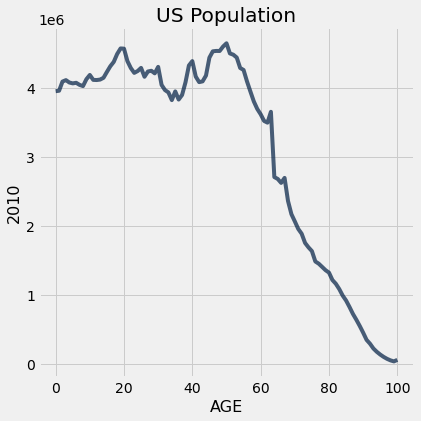

In [92]:
# Add a title to plots
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for COMS1016

In [94]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


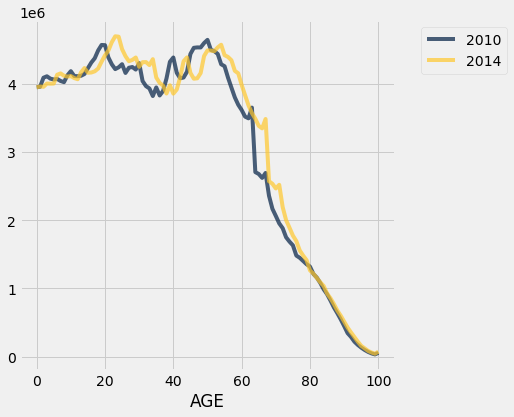

In [95]:
# Age distribution for two different years
# hint just plot AGE
everyone.plot('AGE')

## Males and Females in 2014 ##


In [105]:
# Let's compare male and female counts per age
# no_999 "SEX" codes males as 1 and females as 2
# Get rid of SEX column
males = no_999.where("SEX", 1).drop("SEX")
females = no_999.where("SEX", 2).drop("SEX")

In [106]:
males

AGE,2010,2014
0,2018420,2017857
1,2020332,2023253
2,2088685,2022502
3,2101272,2048618
4,2084312,2043498
5,2076573,2043467
6,2079410,2110328
7,2063139,2122240
8,2054462,2105122
9,2107037,2097272


In [107]:
# Make a new Table pop_2014 where the columns are:
# Age
# Males: number of males in 2014
# Females: number of females in 2014
pop_2014 = Table().with_columns(
    'Age', males.column("AGE"), #,
    'Males', males.column("2014"), #,,
    'Females', females.column("2014") #,
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


In [108]:
pop_2014.sort("Age", descending=True)

Age,Males,Females
100,13729,58468
99,9037,32791
98,13649,46536
97,20479,63252
96,31235,89949
95,42824,114300
94,62130,156525
93,85980,200353
92,109873,244659
91,138080,288866


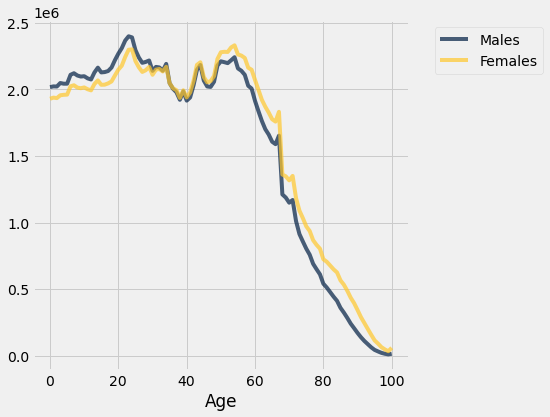

In [109]:
pop_2014.plot('Age')

In [ ]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

In [ ]:
# Add female percent to our table.
# Ad a column names percent female
pop_2014 = ...
pop_2014

In [ ]:
pop_2014.plot('Age', 'Percent female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for COMS1016

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
# Read in the table called 'actors.csv'

actors = ...
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

## Bar Charts ##

In [ ]:
# Highest grossing movies as of 2017
# Read in table called 'top_movies_2017.csv'
top_movies = ...
top_movies

In [ ]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

In [ ]:
# Convert Gross (Adjusted) to millions of dollars for readability
millions = ...
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

# Why not?

In [ ]:
top10_adjusted.barh('Title', 'Millions')